LGM(VIP) : Data Science Internship

Beginner Level Task 1 : Iris Flower Classification

Author : Jagruti Pawar


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("C:\\Users\\Hii Ayush\\Downloads\\IRIS.csv")
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [10]:
# check if duplicate values are present in the data
print("Number of duplicate rows: ",data.duplicated().sum())


Number of duplicate rows:  3


In [11]:
## Drop the duplicate rows

data.drop_duplicates(inplace=True)

data.shape[0]   ## gives the number of rows of the dataset

# first there were 150 rows but now they have reduced to 147


147

# Data Visualization

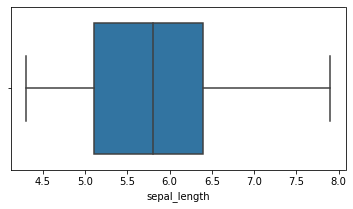

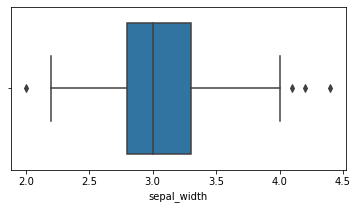

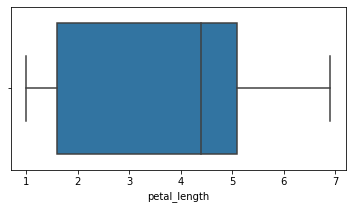

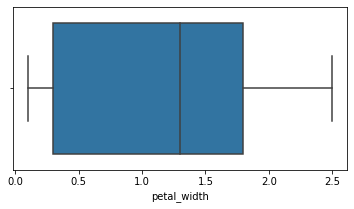

In [12]:
## Check for any outliers present in the numeric data

for i in data.columns:
    if data[i].dtype == 'float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()


In [14]:
## Treating outliers present in the SepalWidthCm Column

q1,q3 = np.percentile(data['sepal_width'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['sepal_width'] = data['sepal_width'].apply(lambda x: upper_fence if x>upper_fence
                                                 else lower_fence if x<lower_fence else x)


<AxesSubplot:xlabel='sepal_width'>

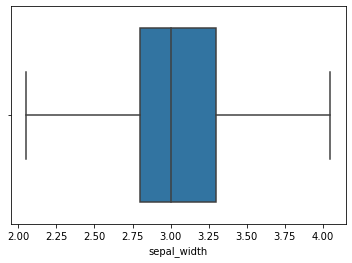

In [16]:
sns.boxplot(data['sepal_width'])


Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64


<AxesSubplot:xlabel='species', ylabel='count'>

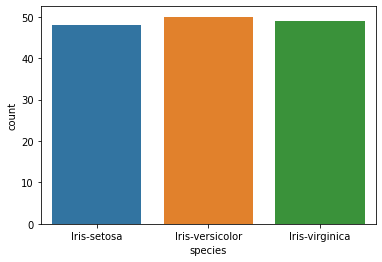

In [18]:
## Target Class
print(data.species.value_counts())
sns.countplot(data['species'])


In [20]:
data.species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

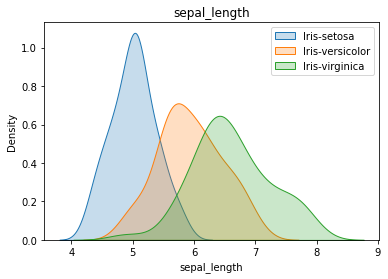

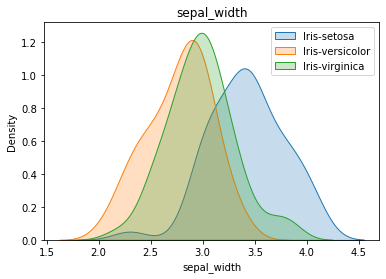

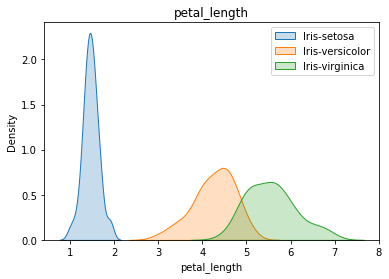

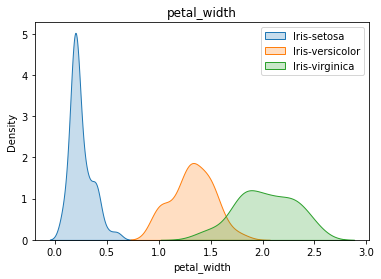

In [22]:
# Distribution of Data by Species

for i in data.columns[ :-1]:
    
    sns.kdeplot(data = data.loc[data.species == 'Iris-setosa'][i],label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.species == 'Iris-versicolor'][i],label="Iris-versicolor", shade=True)
    
    sns.kdeplot(data = data.loc[data.species == 'Iris-virginica'][i],label="Iris-virginica", shade=True)
    
    plt.legend()
    
    plt.title(i)
    
    plt.show()


In [23]:
# Correlation Matrix 

corr= data.corr()
corr


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.110155,0.871305,0.817058
sepal_width,-0.110155,1.000000,-0.420140,-0.355139
petal_length,0.871305,-0.420140,1.000000,0.961883
petal_width,0.817058,-0.355139,0.961883,1.000000


<AxesSubplot:>

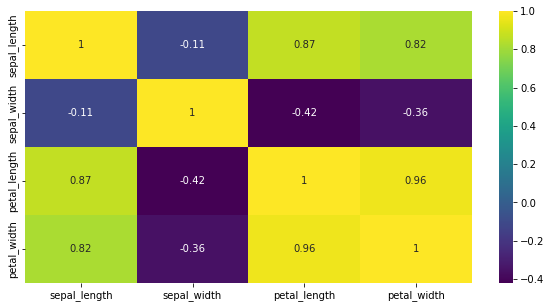

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='viridis')


# K-means Clustering

In [25]:
from sklearn.cluster import KMeans


In [26]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs=1, n_clusters=i, init='k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)


Text(0.5, 1.0, "'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")

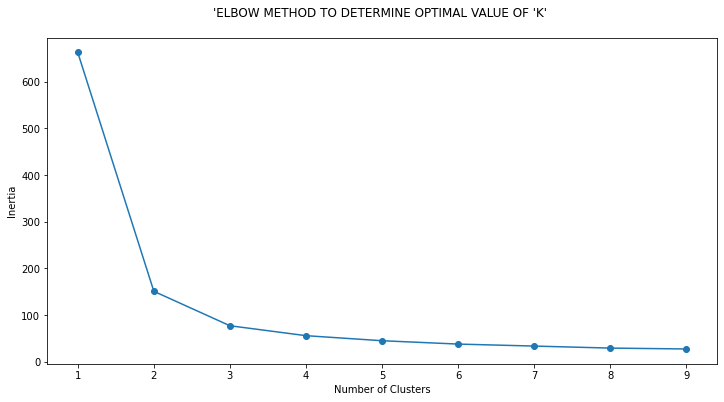

In [27]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['SSE'],marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")


In [28]:
kmeans = KMeans(n_jobs=-1, n_clusters=3, init='k-means++')
kmeans.fit(data.iloc[: ,[0,1,2,3]])
kmeans.cluster_centers_


array([[5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [29]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2])

In [30]:
data['cluster']=kmeans.labels_
data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [31]:
display(data['cluster'].value_counts(), data['species'].value_counts())


2    61
0    48
1    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

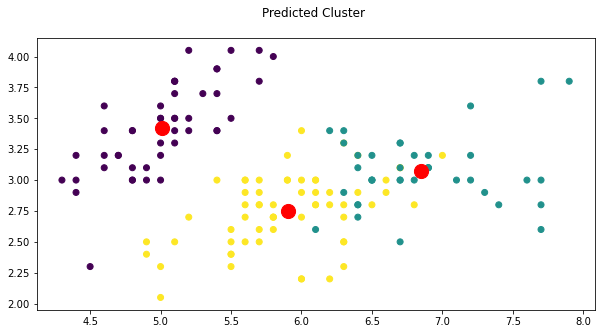

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(data['sepal_length'], data['sepal_width'], c=data.cluster)
plt.title("Predicted Cluster \n")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.show()

In [35]:
data.loc[data['species']=='Iris-setosa']['cluster'].value_counts()  ## the model has identified iris-setosa with 100% accuracy


0    48
Name: cluster, dtype: int64

In [36]:
data.loc[data['species']=='Iris-versicolor']['cluster'].value_counts()  ## the model has identified iris-setosa with 100% accuracy


2    48
1     2
Name: cluster, dtype: int64

In [37]:
data.loc[data['species']=='Iris-virginica']['cluster'].value_counts()  ## the model has identified iris-setosa with 100% accuracy


1    36
2    13
Name: cluster, dtype: int64

In [39]:
data['species-encoded'] = data['species'].apply(lambda x : 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,species-encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1,2
148,6.2,3.4,5.4,2.3,Iris-virginica,1,2


In [40]:
from sklearn.metrics import classification_report
print(classification_report(data['species-encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        48
           2       0.21      0.27      0.24        49

    accuracy                           0.09       147
   macro avg       0.07      0.09      0.08       147
weighted avg       0.07      0.09      0.08       147



<AxesSubplot:>

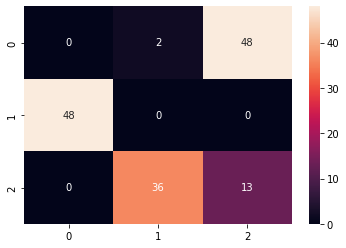

In [42]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['species-encoded'],data['cluster']),annot=True)